## Respuesta dinámica a excitaciones generales sin amortiguación
### Cálculo directo de la integral de Duhamel
#### Fuerza senoidal


#### Problema 6. 
La torre de la figura es sometida a una fuerza $F(t)=sen(30t)$ aplicada en su parte superior como se muestra en la figura. Desprecie la amortiguación y determine la respuesta.


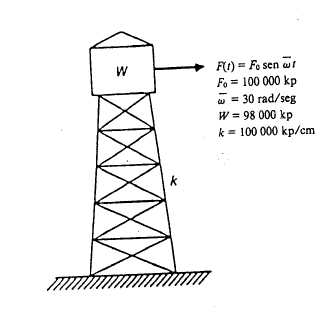

In [1]:
from IPython.display import Image
Image(filename="imagenes/fig_2.png")

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from librerias.integral import cuad_gauss # librería que aproxima las integrales mediante el método de Cuadratura de Gauss

In [3]:
# Iniciamos las variables
P = 98000 # Peso W en kp
g = 980 # Gravedad en cm/s2
m = P/g  # masa en kp*s2/cm
k = 100000  # rigidez en kp/cm

w = 30 #(k/m)**0.5  # Frecuencia angular natural(rad/s)

F = F = lambda t: 100000 * np.sin(w * t)	# Fuerza con aceleración constante aplicada al cimiento
tf = 0.4 # tienpo hasta que se aplica la fuerza
dt = 0.02 # intervalos de tiempo
# print(w)

Cálculos:

Utilizaremos las siguientes ecuaciones:
$$ A(t_i)=A(t_{i-1}) + \int^{t_i}_{t_{i-1}} F(\tau) cos(\omega \tau) d\tau$$
$$ B(t_i)=B(t_{i-1}) + \int^{t_i}_{t_{i-1}} F(\tau) sen(\omega \tau) d\tau$$


$$ y(t_i) = \frac{1}{m \omega}(A(t_i)sen(\omega t_i)-B(t_i)cos(\omega t_i) )$$

In [4]:
# Variables iniciales necesarias
y0 = 0 # desplazamiento inicial
v0 = 0 # velocidad inicial
a0 = 0 # acelereación inicial
A = 0
B = 0
AA = [A]
BB = [B]
y = [y0]
v = [v0]
a = [a0]
n = int(tf / dt) 
tt = np.arange(0, tf + dt, dt) # vector con los intervalos de tiempo

In [5]:
# definimos las ecuaciones dentro de las integrales
eqA = lambda t: F(t) * np.cos(w * t)
eqB = lambda t: F(t) * np.sin(w * t)

In [6]:
# definimos las función y(t) = f y derivadas
f = lambda t: (A * np.sin(w * t) - B * np.cos(w * t)) / (m * w)
h = 0.000001
df = lambda t: (f(t + h) - f(t))/h # primera derivada
# ddf = lambda t: (df(t + h) - df(t))/h # segunda derivada
df2 = lambda t: (f(t + h) -2*f(t)+ f(t-h))/(h**2) # segunda derivada

In [7]:
# iteramos
for i in range(n):
    A = A + cuad_gauss(tt[i], tt[i + 1], eqA)
    B = B + cuad_gauss(tt[i], tt[i + 1], eqB)
    
    AA.append(A)
    BB.append(B)
    y.append(f(tt[i + 1]))
    v.append(df(tt[i + 1]))
    a.append(df2(tt[i + 1]))

In [8]:
DF = pd.DataFrame({'t(s)':tt,'A':AA,'B':BB,'Desplazamiento':y,'Velocidad':v,'Aceleración':a})
DF


,t(s),A,B,Desplazamiento,Velocidad,Aceleración
0,0.00,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.02,531.36854,223.30076,0.038578,5.646407,-34.720567
2,0.04,1447.82810,1437.11401,0.276228,18.640657,-248.604748
3,0.06,1580.63202,3368.76703,0.768229,29.215083,-691.405488
4,0.08,760.41752,4830.13717,1.358449,27.017916,-1222.604018
5,0.10,33.19144,5232.84625,1.728387,7.055223,-1555.548357
6,0.12,326.37392,5338.61012,1.547672,-26.551923,-1392.905569
7,0.14,1266.07389,6287.83425,0.659733,-61.010601,-593.761706
8,0.16,1653.90656,8145.27232,-0.786755,-79.692815,708.077819
9,0.18,995.27494,9817.44686,-2.333392,-69.547754,2100.050800


In [9]:
print("Desplazamiento máximo: {}\nVelocidad máxima: {}\nAceleración máxima: {}".format(round((DF['Desplazamiento'].abs()).max(),3),round((DF['Velocidad'].abs()).max(),3),round((DF['Aceleración'].abs()).max(),3)))

Desplazamiento máximo: 5.924
Velocidad máxima: 176.569
Aceleración máxima: 5331.402
